# Amiruddin saifi

**@The Sparks Foundation**

# Task1. Prediction using Supervised ML

**In This Task We are going to predict the percentage of marks of a student based on the hours used to study**

In [2]:
#importing the libraries which is required to solve this task.
import pandas as pd     #for Data analysis
import numpy as np      #It provides a high-performance multidimensional array object
import matplotlib.pyplot as plt  #To visualise the data
%matplotlib inline
import seaborn as sns

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10) #print the 10 rows of the dataset

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
s_data.shape #25 rows and 2 columns

(25, 2)

In [5]:
s_data.info() #to get the information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
s_data.describe() #perform some basic operations using describe funtion

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


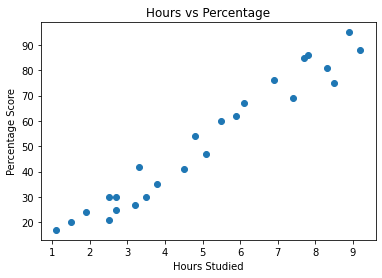

In [8]:
# Plotting the distribution of scores using matplotlib function
plt.scatter(s_data.Hours,s_data.Scores)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**Not:-From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

**y=mx+c**

# Preparing the data

In [9]:
#Now we are going to seprate our data into two part features and targate
X = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86]))

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the Algorithm

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [12]:
regressor.coef_  # find coefficient

array([9.91065648])

In [13]:
regressor.intercept_  # find intercept

2.018160041434662

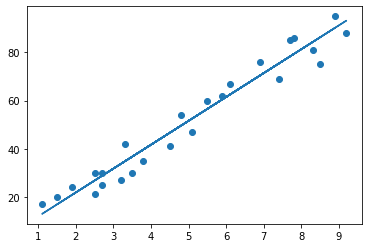

In [14]:
# Plotting the regression line b=mx+c
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Making Predictions

In [15]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


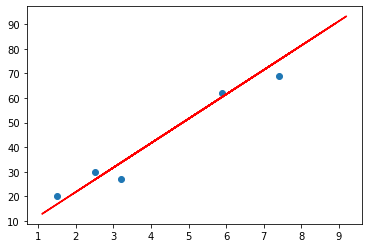

In [17]:
plt.scatter(X_test,y_test)
plt.plot(X_train,regressor.predict(X_train),color='r')

# Q1. What will be predicted score if a student studies for 9.25 hrs/day

In [18]:
score=regressor.predict([[9.25]])
score

array([93.69173249])

In [19]:
# You can also test with your own data
hours = [[9]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9]]
Predicted Score = 91.21406836721482


# Evaluating the model

In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


# Thanks for Whatching